# Titanic Survival Prediction

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

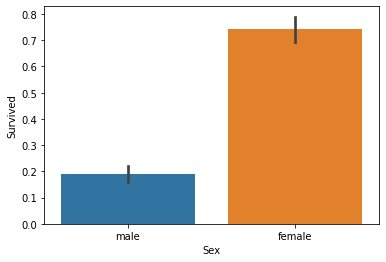

In [121]:
sns.barplot(x="Sex", y="Survived", data=train)


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

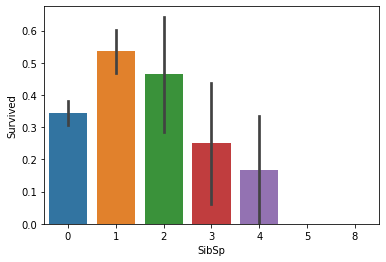

In [122]:
sns.barplot(x="SibSp", y="Survived", data=train)

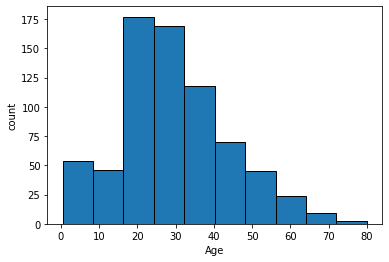

In [123]:
plt.hist(train.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

In [124]:
# delete unwanted data
train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
test.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

In [125]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [126]:
train = train.fillna(train.mean())
train = train.fillna(train['Embarked'].mode()[0])
test = test.fillna(test.mean())
test = test.fillna(test['Embarked'].mode()[0])

In [127]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [128]:

train['Sex_code'] = train['Sex'].map({'female':1, 'male':0}).astype('int')
train['Embarked_code'] = train['Embarked'].map({'S':0 , 'C':1, 'Q':2})
test['Sex_code'] = test['Sex'].map({'female':1, 'male':0}).astype('int')
test['Embarked_code'] = test['Embarked'].map({'S':0 , 'C':1, 'Q':2})
train.info()
train.drop(['Sex', 'Embarked','SibSp'],axis=1,inplace=True)
test.drop(['Sex', 'Embarked','SibSp'],axis=1,inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Sex_code       891 non-null    int64  
 9   Embarked_code  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


,Survived,Pclass,Age,Parch,Fare,Sex_code,Embarked_code
0,0,3,22.0,0,7.2500,0,0
1,1,1,38.0,0,71.2833,1,1
2,1,3,26.0,0,7.9250,1,0
3,1,1,35.0,0,53.1000,1,0
4,0,3,35.0,0,8.0500,0,0


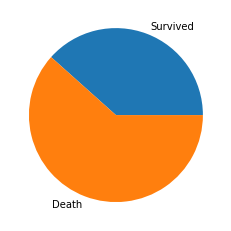

In [129]:
survived = train[train['Survived']==1].Survived.count()
Death = train[train['Survived']==0].Survived.count()
plt.pie([survived,Death],labels=["Survived", 'Death'])
plt.show()

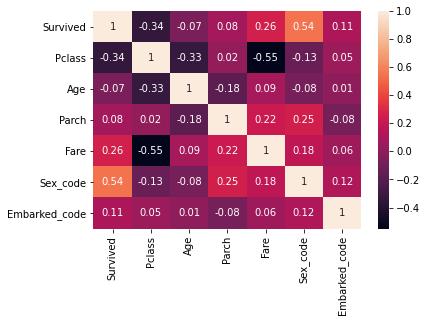

In [130]:
hm = sns.heatmap(data=train.corr().round(2),annot=True)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [141]:
ids = test['PassengerId']
x_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
x_test = test.drop(['PassengerId'],axis=1)

In [142]:
# x_tr, x_te, y_tr, y_te = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [151]:
model = LogisticRegression()
model.fit(x_train,y_train)
score = model.score(x_train,y_train)
print(round(score*100,2),"%")

79.69 %


In [152]:
prediction = model.predict(x_test)
output = pd.DataFrame({"PassengerId": ids , "Survived": prediction})
output.to_csv("Submission_prediction.csv",index=False)